In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/Colab Notebooks/lab05/Lab 5.zip" -d "content/"

Archive:  /content/drive/MyDrive/Colab Notebooks/lab05/Lab 5.zip
   creating: content/Lab 5/
  inflating: content/Lab 5/GOOG.csv  
  inflating: content/Lab 5/IMDB Dataset.csv  
  inflating: content/Lab 5/Q1.ipynb  
  inflating: content/Lab 5/Q2.ipynb  
  inflating: content/Lab 5/Q3.ipynb  


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [5]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [6]:
# Load Data
import os
print(os.listdir("content/Lab 5"))
file_path = 'content/Lab 5/GOOG.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

['IMDB Dataset.csv', 'Q2.ipynb', 'GOOG.csv', 'Q3.ipynb', 'Q1.ipynb']


In [7]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [8]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [9]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

In [10]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [ ]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [11]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [12]:
# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model.add(Dropout(0.2))  # Experiment with dropout for regularization

model.add(LSTM(units=50, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.3904
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.1444
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1234
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1132
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.1100
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.1036
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0945
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0923
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0839
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0855
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0929
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0914
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0927
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1002
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0892
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━

In [ ]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 311ms/step


In [ ]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

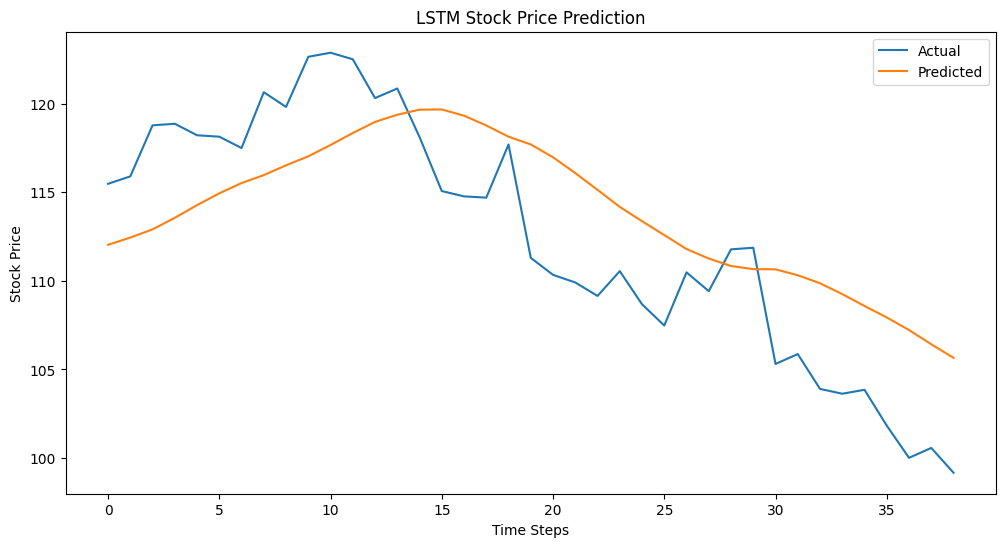

In [ ]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()

